## Analysis of the illocutions grüßen and grüßen lassen in August Wilhelm Schlegels correspondence

In [1]:
import sys
from os import getcwd
sys.path.append(f'{getcwd()}/tools/')
from os.path import abspath, dirname, join
import warnings
warnings.simplefilter('ignore', category=(UserWarning, FutureWarning, SyntaxWarning))
from math import sqrt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

BASE_PATH = abspath(getcwd())
PARENT_PATH = dirname(dirname(BASE_PATH))
DATA_PATH = join(PARENT_PATH, 'resources')
SAVE_PATH = join(PARENT_PATH, 'network_degree')
IMAGE_PATH = join(PARENT_PATH, 'network_diagram')
DELIMITER = ';'

### Load the data and preprocess it

In [2]:
triples_file_path = join(DATA_PATH, '2023_12_14_triples.csv')
triples_df = pd.read_csv(triples_file_path, sep=',', encoding='utf-8')
drop_df = triples_df.drop(['letter_ID', 'letter_name', 'letter_date'], axis=1)
clean_illocution_df = drop_df[drop_df.illocution != 'none']

### Visualize the network of illocutions grüßen and grüßen lassen

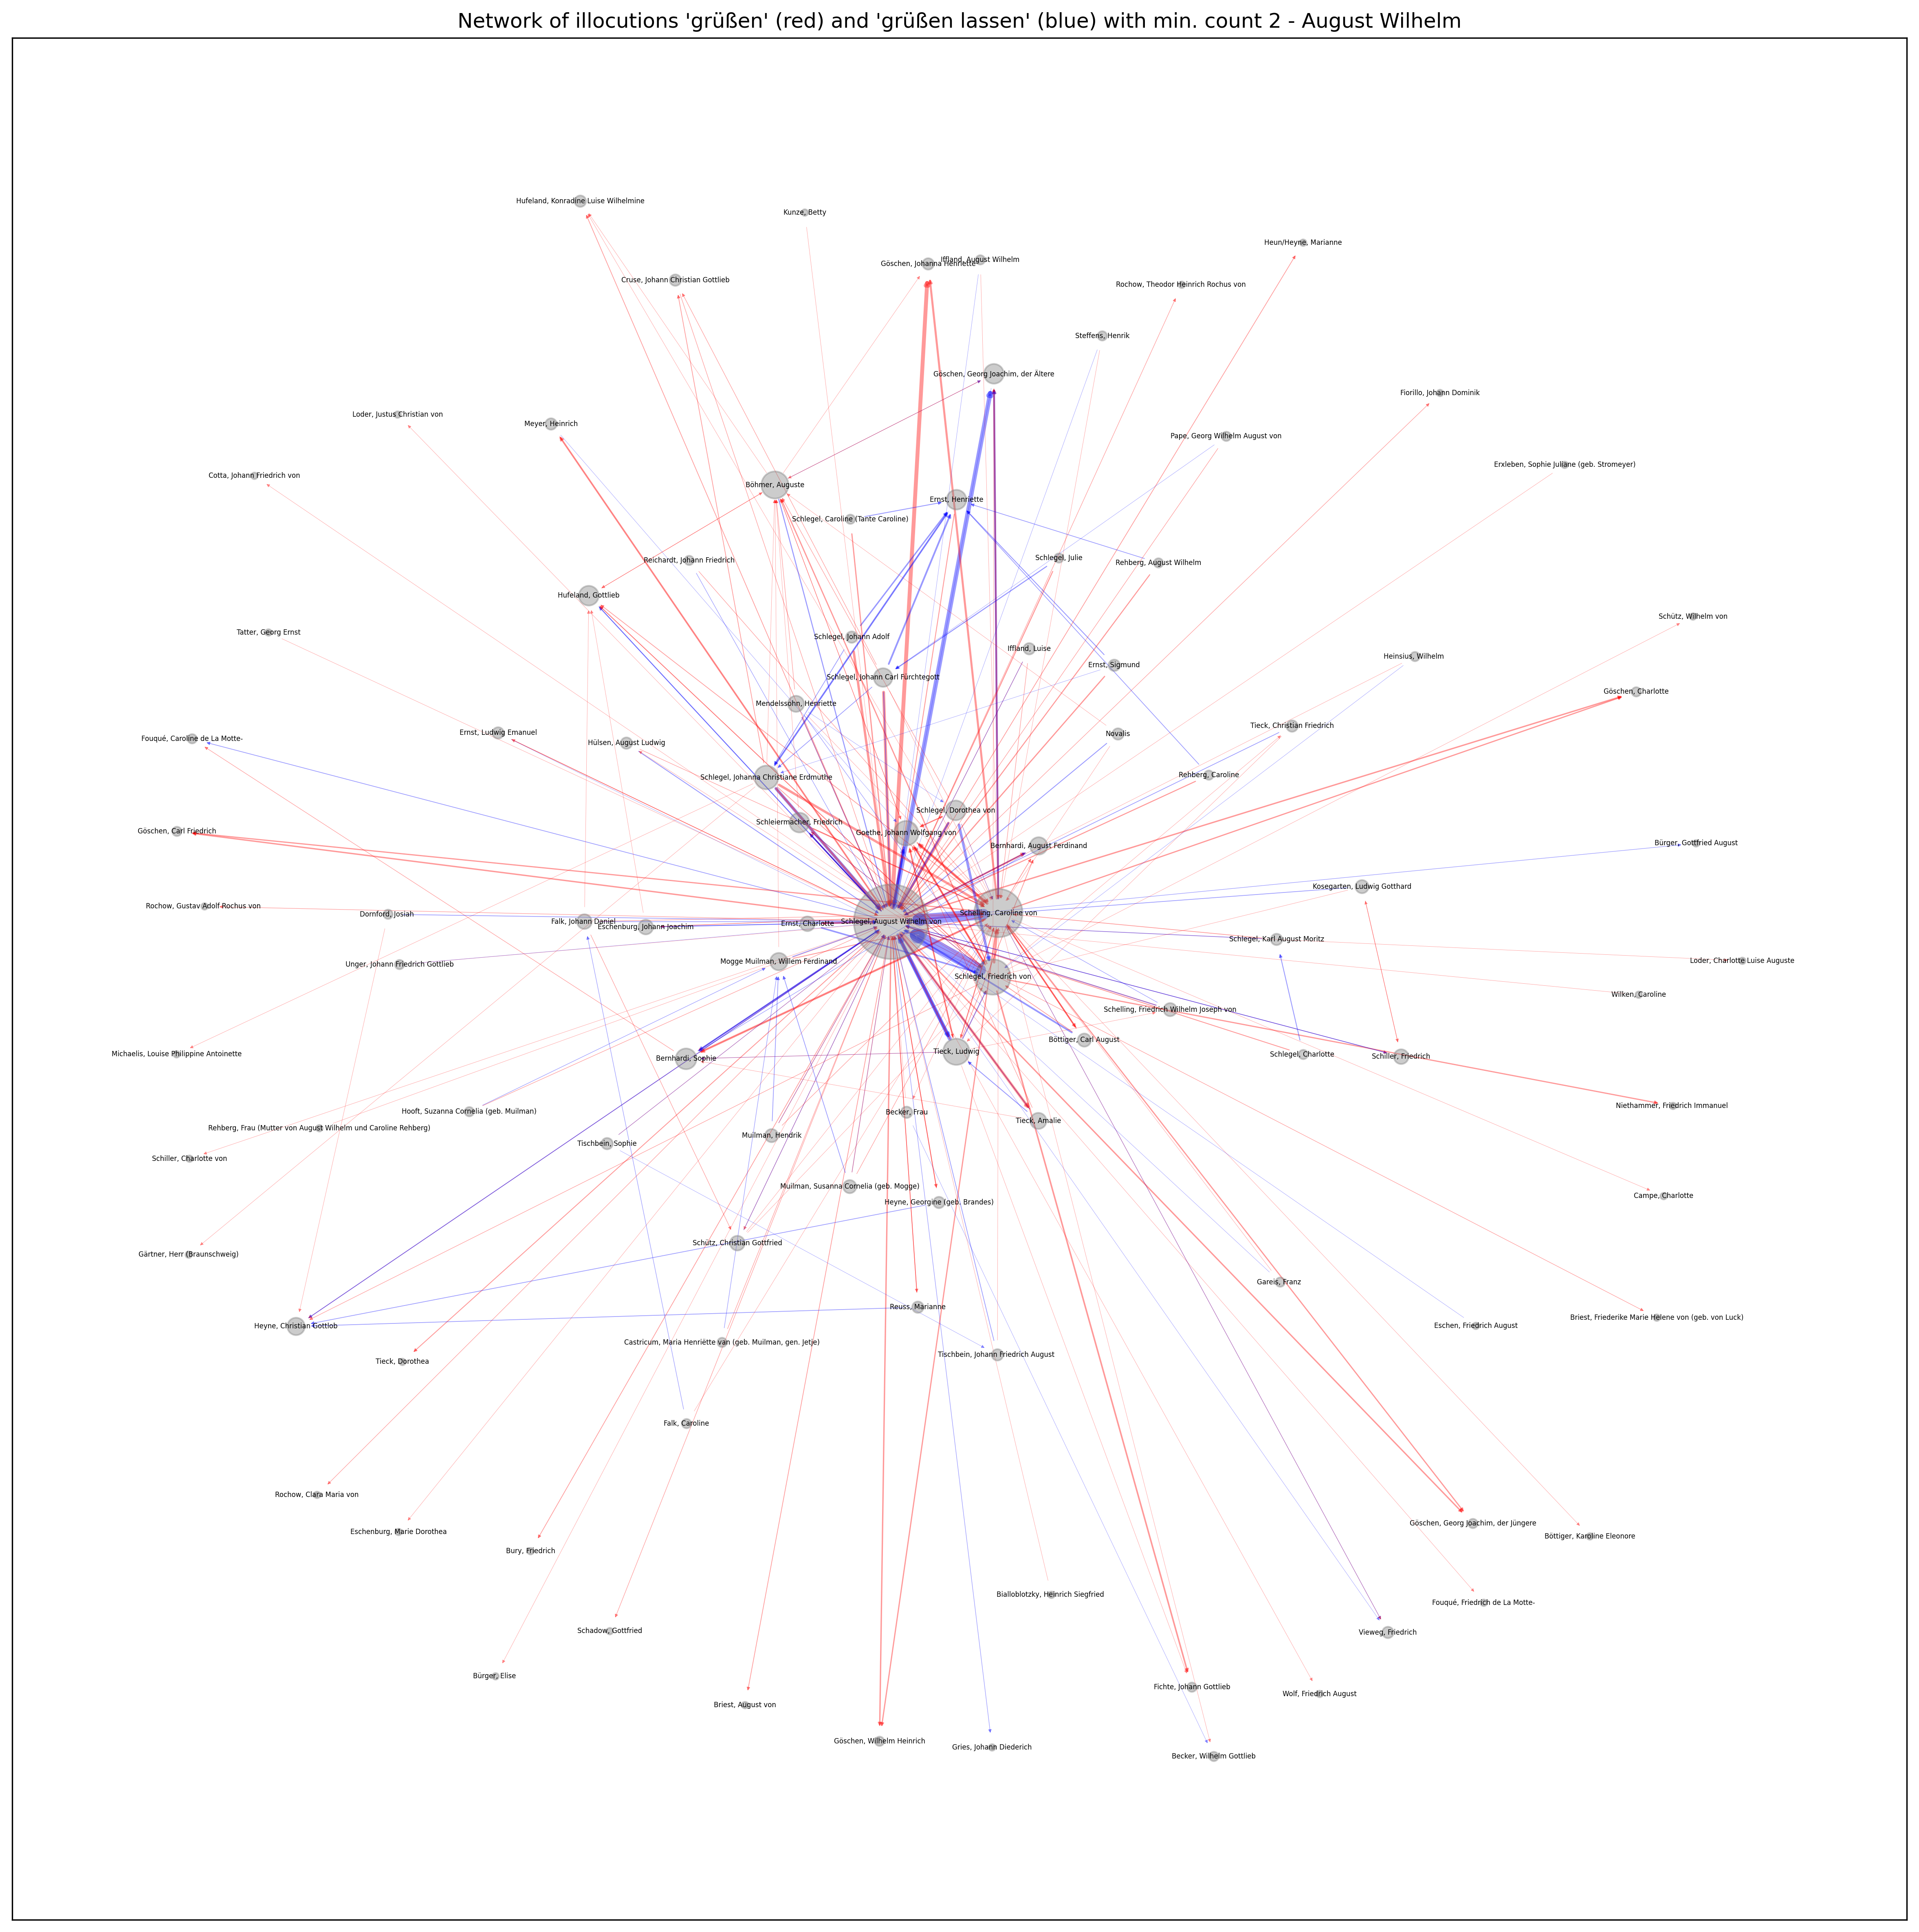

In [3]:
g_gl_df = clean_illocution_df[(clean_illocution_df.illocution == 'grüßen')|(clean_illocution_df.illocution == 'grüßen lassen')]
g_gl_df = g_gl_df.astype({'object_ID':'int'})
g_gl_df = g_gl_df.astype({'object_ID':'str'})
g_gl_groupby_df = g_gl_df.groupby(['subject_ID']).value_counts()
g_gl_groupby_df = g_gl_groupby_df.reset_index()
g_gl_groupby_df['weight'] = [c*0.1 for c in g_gl_groupby_df['count']]
g_gl_groupby_df['color'] = np.where(g_gl_groupby_df['illocution'] == 'grüßen', 'r', 'b')
cnt_g_gl_groupby_df = g_gl_groupby_df[g_gl_groupby_df['count'] > 1]

e = nx.from_pandas_edgelist(cnt_g_gl_groupby_df,
                             source='subject_name',
                             target='object_name',
                             edge_attr=True,
                             create_using=nx.MultiDiGraph())
weights = nx.get_edge_attributes(e, 'weight').values()
colors = nx.get_edge_attributes(e, 'color').values()
degrees = dict(e.degree())

plt.figure(figsize=(20, 20), dpi=300)
pos = nx.spring_layout(e, k=4/sqrt(e.order()))
nx.draw_networkx_nodes(e, pos, node_size=[v*15 for v in degrees.values()], node_color='gray', alpha=0.4)
nx.draw_networkx_edges(e, pos, width=list(weights), edge_color=colors,
                       arrows=True, arrowsize=4, arrowstyle='-|>', connectionstyle='arc3', alpha=0.4)
nx.draw_networkx_labels(e, pos, font_family='sans-serif', font_color='black', font_size=4, font_weight='normal')

plt.title('Network of illocutions \'grüßen\' (red) and \'grüßen lassen\' (blue) with min. count 2 - August Wilhelm')
plt.savefig(join(IMAGE_PATH, 'Network of illocutions \'grüßen\' (red) and \'grüßen lassen\' (blue) with min. count 2 - August Wilhelm.png'), bbox_inches='tight')
plt.show()

### Save the dataframe to a CSV file

In [4]:
e_degree_df = pd.DataFrame(e.degree())
e_degree_df.columns = ['node_name', 'degree']
e_degree_df = e_degree_df.sort_values(by='degree', ascending=False)
e_degree_df.to_csv(join(SAVE_PATH, 'Network of illocutions \'grüßen\' (red) and \'grüßen lassen\' (blue) with min. count 2 - August Wilhelm.csv'),
                   sep=';',
                   header=['node', 'degree'],
                   index=False,
                   encoding='utf-8')

### Visualize the network of illocution grüßen

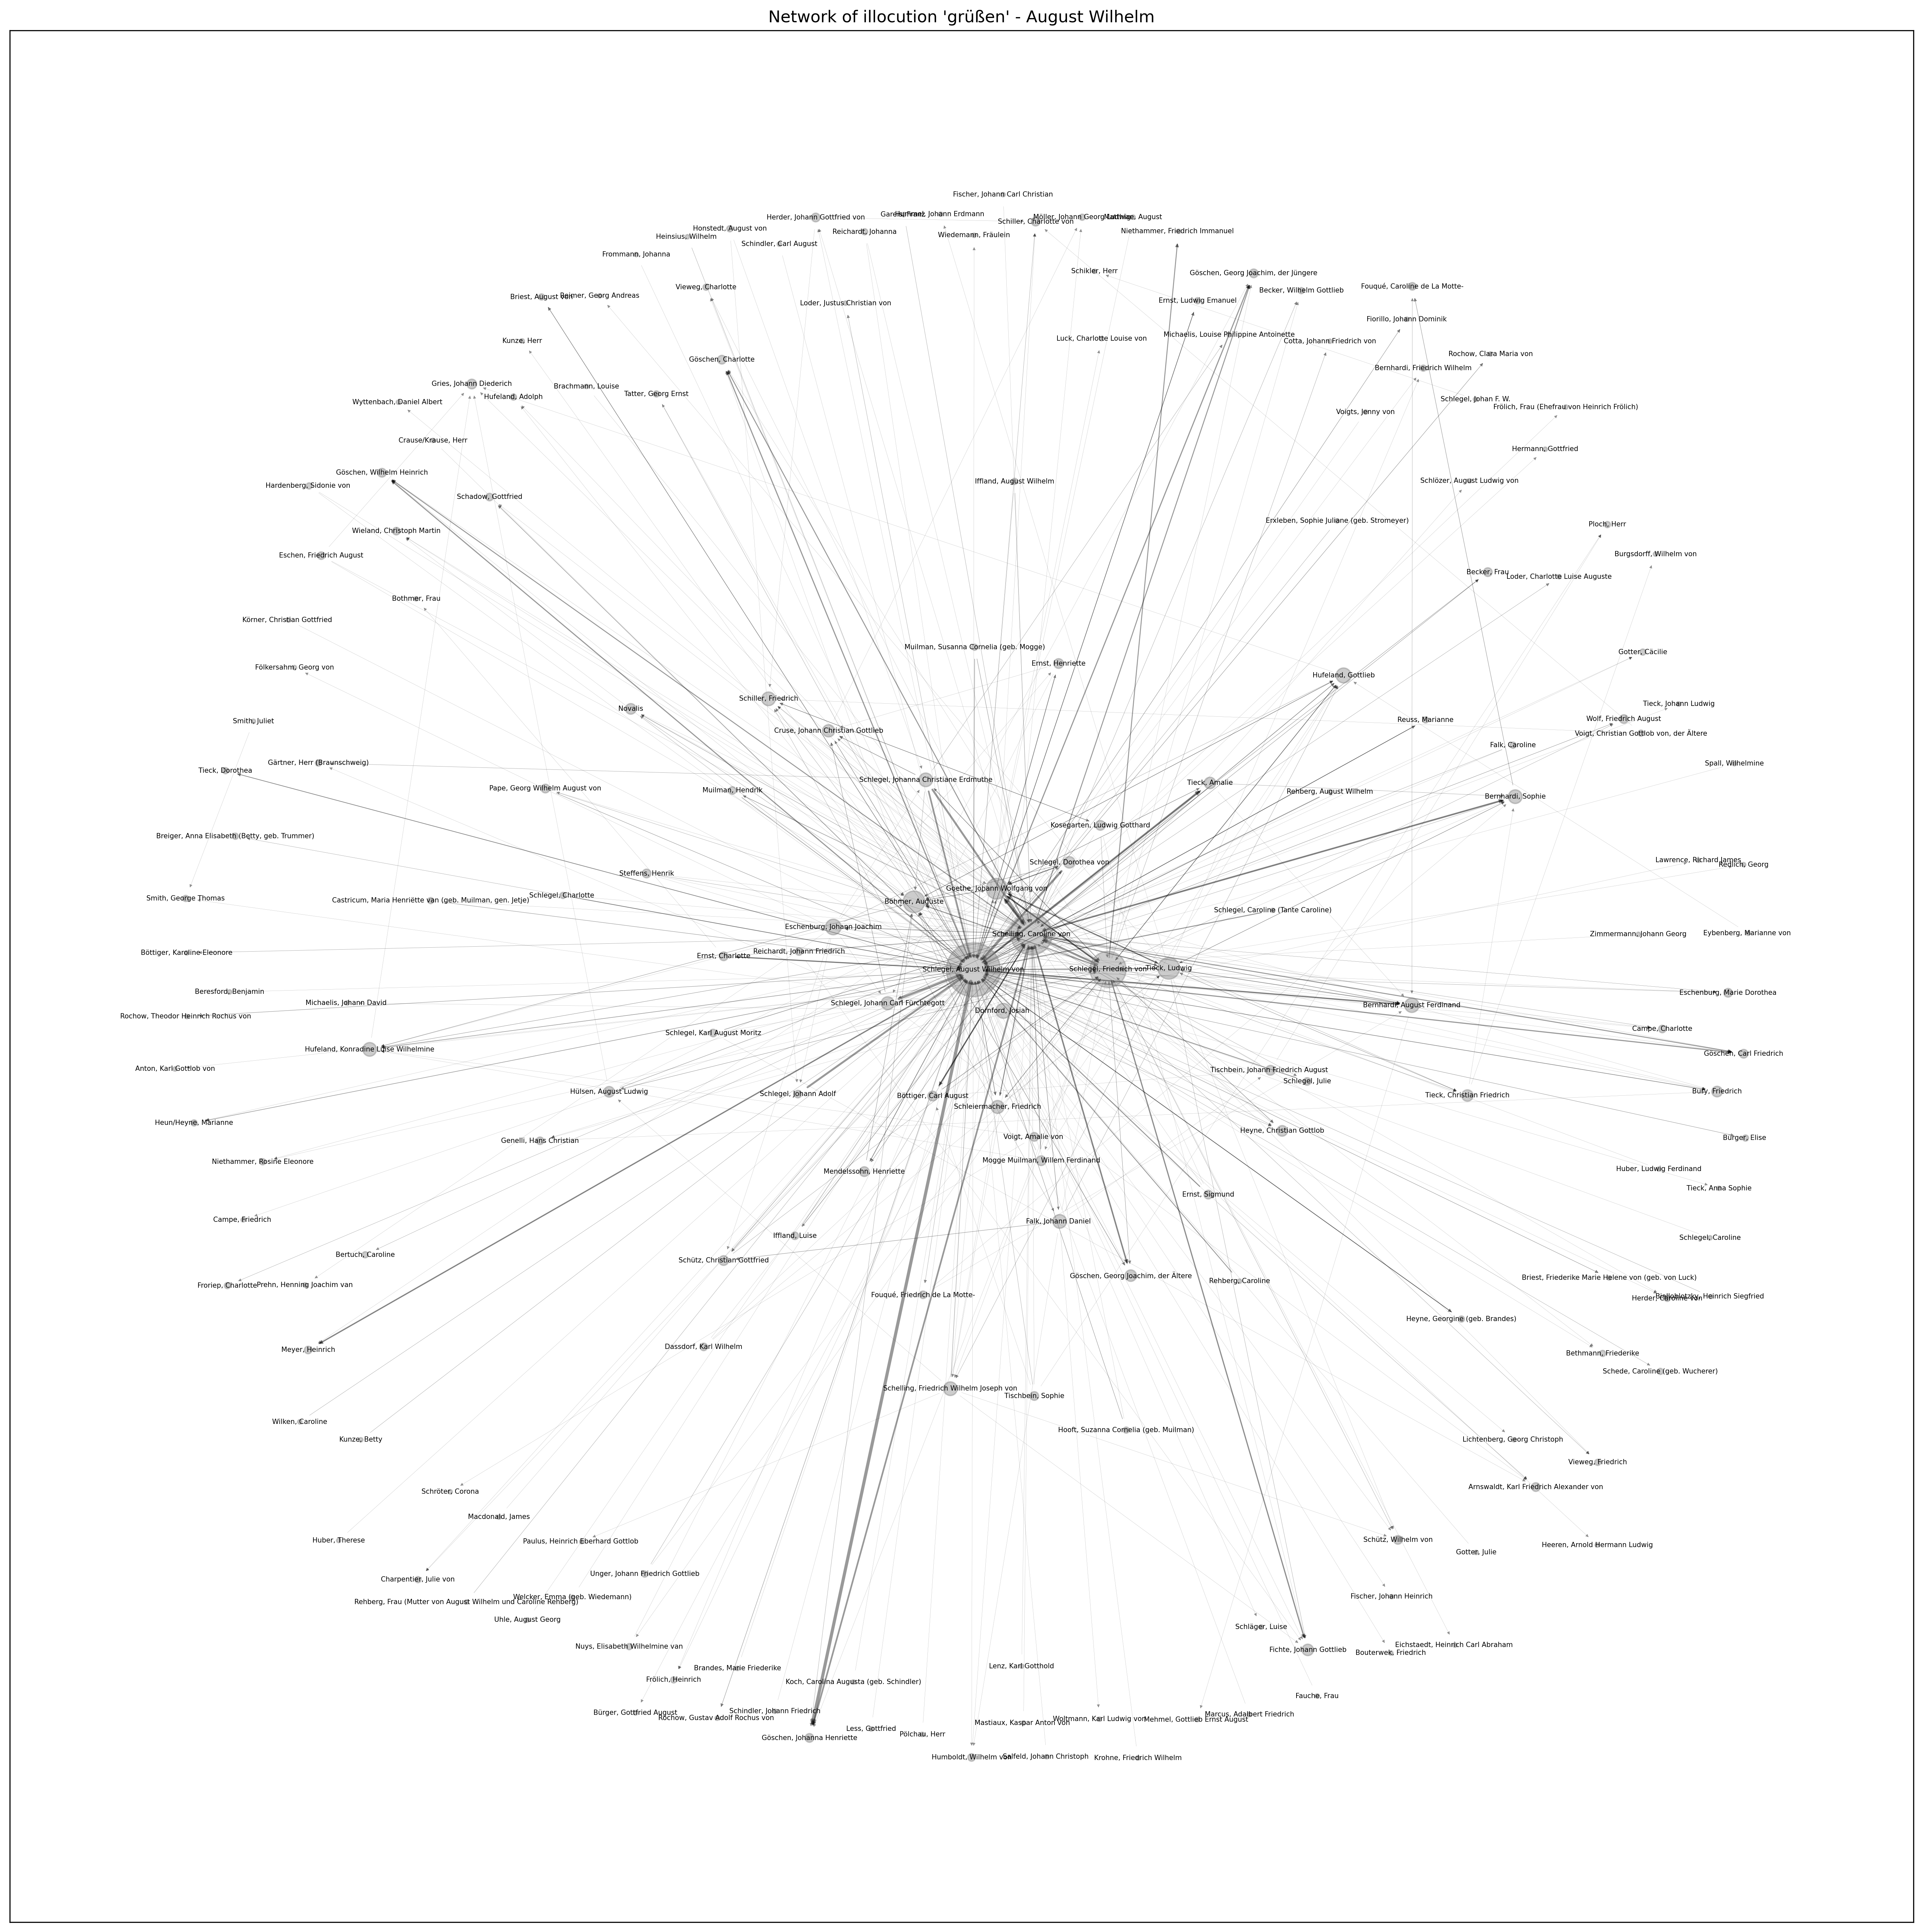

In [5]:
drop_df = triples_df.drop(['letter_ID', 'letter_name', 'letter_date'], axis=1)
clean_illocution_df = drop_df[drop_df.illocution != 'none']
g_df = clean_illocution_df[clean_illocution_df.illocution == 'grüßen']
g_df = g_df.astype({'object_ID':'int'})
g_df = g_df.astype({'object_ID':'str'})
g_groupby_df = g_df.groupby(['subject_name']).value_counts()
g_groupby_df = g_groupby_df.reset_index()
g_groupby_df['weight'] = [c/10 for c in g_groupby_df['count']]

g = nx.from_pandas_edgelist(g_groupby_df,
                            source='subject_name',
                            target='object_name',
                            edge_attr=True,
                            create_using=nx.MultiDiGraph())

weights = nx.get_edge_attributes(g, 'weight').values()
degrees = dict(g.degree())

plt.figure(figsize=(25, 25), dpi=300)
pos = nx.spring_layout(g, k=5/sqrt(g.order()))
nx.draw_networkx_nodes(g, pos, node_size=[v*10 for v in degrees.values()], node_color='gray', alpha=0.4)
nx.draw_networkx_edges(g, pos, width=list(weights), arrows=True, 
                       arrowsize=5, arrowstyle='-|>', connectionstyle='arc3', alpha=0.4)
nx.draw_networkx_labels(g, pos, font_family='sans-serif', font_color='black', font_size=5, font_weight='normal')

plt.title('Network of illocution \'grüßen\' - August Wilhelm')
plt.savefig(join(IMAGE_PATH, 'Network of illocution \'grüßen\' - August Wilhelm.png'), bbox_inches='tight')
plt.show()

### Save the dataframe to a CSV file

In [6]:
g_degree_df = pd.DataFrame(g.degree())
g_degree_df.columns = ['node_name', 'degree']
g_degree_df = g_degree_df.sort_values(by='degree', ascending=False)
g_degree_df.to_csv(join(SAVE_PATH, 'Network of illocution \'grüßen\' - August Wilhelm.csv'),
                   sep=';',
                   header=['node', 'degree'],
                   index=False,
                   encoding='utf-8')